## Project Overview

This project uses machine learning algorithms to develop a model for accurately predicting customers who churn using the dataset provided. The dataset contains 20 predictor variables primarily reflecting customer usage patterns, with a total of 3,333 records. Among these, 483 represent customers who have churned, while the remaining 2,850 are non-churners.

The target variable, churn, is categorical, making classification algorithms suitable for building the predictive model. Model performance is assessed using recall as the primary evaluation metric.

## Business understanding

### Business Problem

For telecommunications companies, growing their revenue base depends on attracting new customers while simultaneously increasing customer retention. Customer churn is a critical concern for large businesses, representing the rate at which subscribers or regular customers cancel their subscriptions or stop engaging with the company.

Churn can occur for various reasons, including switching to competitors offering better prices, dissatisfaction with customer service, or disengagement due to a lack of meaningful touchpoints.

Syriatel, a leading mobile telecommunications and data services provider based in Damascus, Syria, offers a range of services including calls, messaging, news, GSM, and internet services. The company has built a strong reputation by prioritizing customer satisfaction and social responsibility. Syriatel recognizes that fostering long-term customer relationships is more cost-effective than acquiring new customers. Retaining existing customers is central to their strategy, making churn prediction a critical business priority.

This project aims to develop a machine learning model that accurately predicts customers most likely to churn and identifies key factors driving churn. With this insight, Syriatel can proactively address customer issues and take actions to prevent churn, ultimately enhancing customer retention.

### Objectives

- To build a machine learning model that can accurately predict customers  who will churn based on the information available in the dataset.<br>

- To identify the features that are important for predicting customer churn. <br>

- To deliver insights that enable the company to implement cost-effective and targeted retention strategies, improving customer satisfaction and reducing the cost associated with acquiring new customers.

### Success criteria

- Predictive Model Performance: Develop a model capable of accurately predicting customer churn with a recall score of at least 85%, ensuring the model identifies a significant portion of churned customersn Achieve a balance between precision and recall to minimize false positives and false negatives.

- Insights on Churn Drivers: Identify the most important features influencing churn, providing actionable insights into customer behavior and dissatisfaction.

- Reduction of False Negatives: Ensure the model minimizes false negatives, as failing to identify churned customers is costlier for the business.

- Handling of Imbalanced Data: Successfully address the class imbalance in the dataset so that the model performs well for both churned and non-churned customers.

- Model Interpretability: Ensure the model and its predictions are interpretable, allowing stakeholders to trust and understand the results for decision-making.

- Business Relevance: Translate model outcomes into actionable business strategies, such as identifying at-risk customers and offering targeted interventions to retain them.

- Scalability: Create a solution that can be scaled and adapted to future datasets, enabling ongoing churn prediction as customer behaviors and patterns evolve.
d>

## Data Understanding and preparation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Data

In [5]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
# shape
df.shape

(3333, 21)

In [9]:
# summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Data Cleaning

In [11]:
# finding missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [13]:
# finding duplicates
df.duplicated().sum()

0

In [15]:
# dropping unnecessary columns
df.drop('phone number', axis=1, inplace=True)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [17]:
# Converted international plan and voice mail plan into binary numeric columns (1 for "yes", 0 for "no").
print(df['international plan'].unique())
print(df['voice mail plan'].unique())

['no' 'yes']
['yes' 'no']


In [19]:
df['international plan'] = df['international plan'].str.strip().str.lower()
df['voice mail plan'] = df['voice mail plan'].str.strip().str.lower()
print(df['international plan'].unique())
print(df['voice mail plan'].unique())

['no' 'yes']
['yes' 'no']


In [21]:
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
print(df[['international plan', 'voice mail plan']].head())

   international plan  voice mail plan
0                   0                1
1                   0                1
2                   0                0
3                   1                0
4                   1                0


In [11]:
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [23]:
# saving the new dataset
df.to_csv('bigml', index=False)

## Exploratory Data Analysis(EDA)

In [25]:
df1 = pd.read_csv('bigml')
df1.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Univariate Analysis 

The target variable for this classification project is churn.

In [27]:
# unique values of the target variable
df1['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [29]:
# Churn Distribution: Check the proportion of churned vs. non-churned customers
df1['churn'].value_counts(normalize=True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

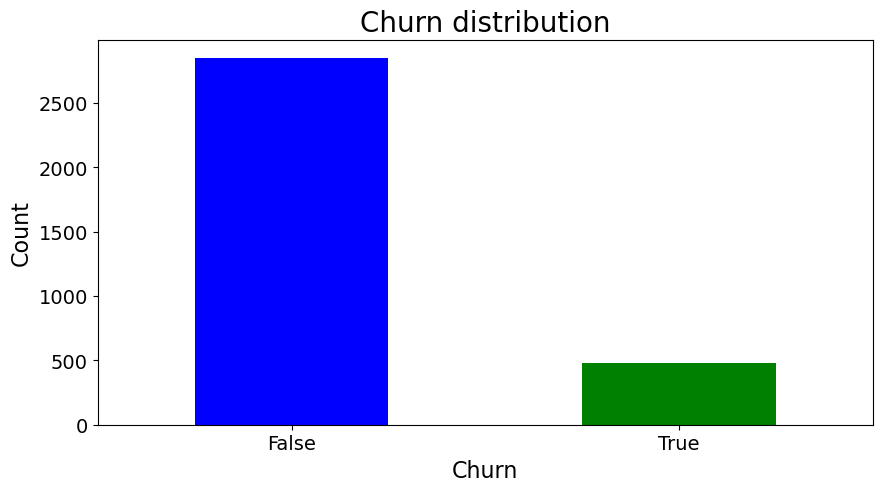

In [31]:
# bar chart showing distribution of target variable
fig, ax = plt.subplots(figsize=(10, 5))

df1.groupby('churn').size().plot(kind='bar', color=['blue', 'green'], ax=ax)
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Churn', fontsize=16)
ax.set_title('Churn distribution', fontsize=20)

ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14)

plt.xticks(rotation=0) 
plt.show()

There is a class imbalance problem since the target class has an uneven distribution of observations. 85.51% of the data belongs to the False class while 14.49% belongs to the true class.

The dataset has both categorical and continuous features.

In [33]:
# descriptive statistics
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
international plan,3333.0,0.096910,0.295879,0.00,0.00,0.00,0.00,1.00
voice mail plan,3333.0,0.276628,0.447398,0.00,0.00,0.00,1.00,1.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00


The scaling differs across the features, and a few of the features are not normally distributed. The features will therefore have to be scaled and normalized.

### Feature Distributions

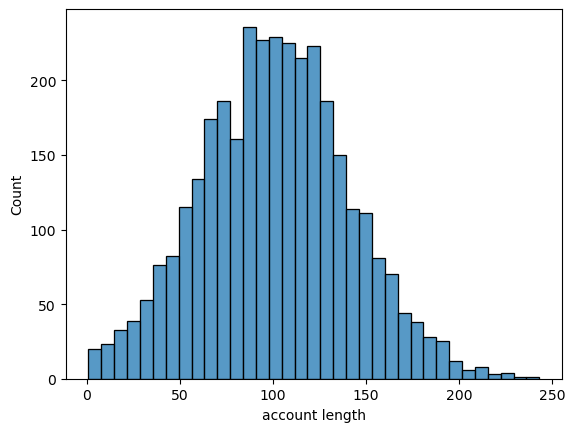

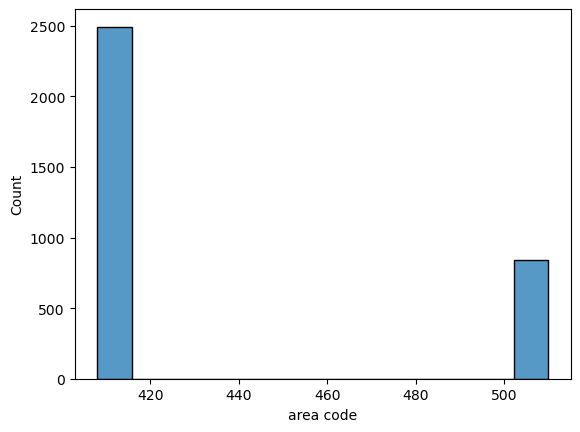

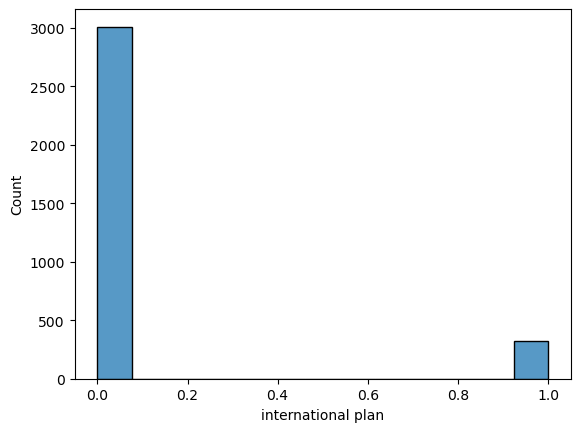

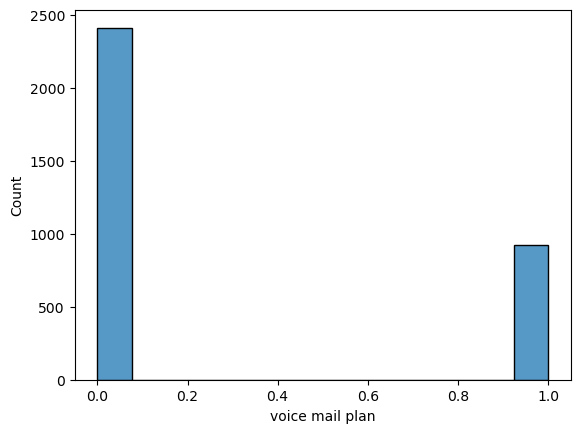

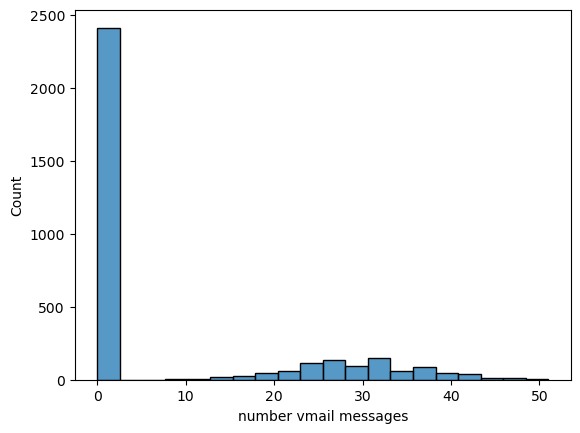

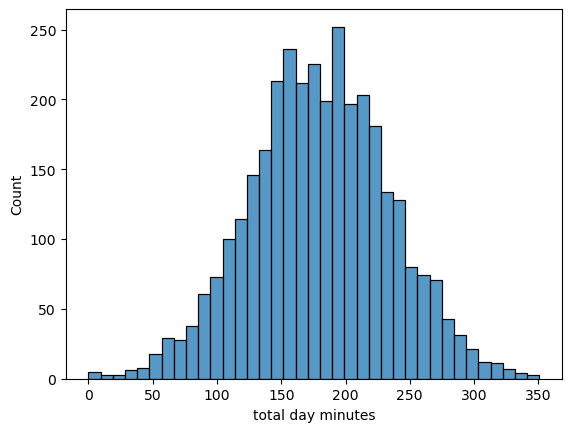

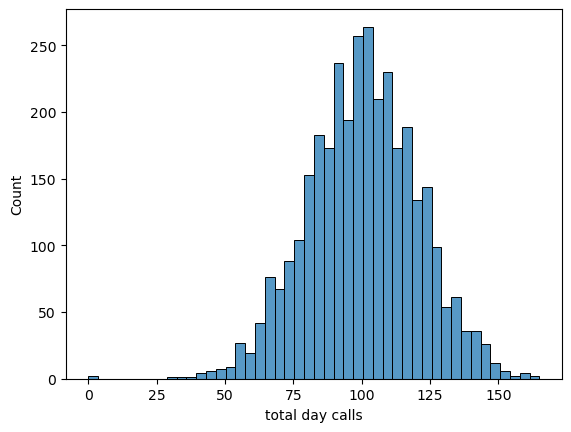

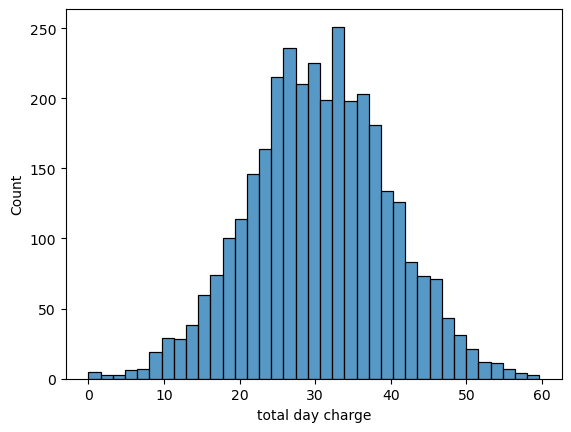

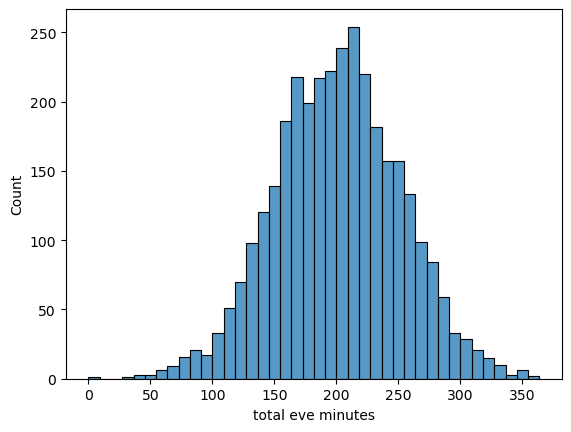

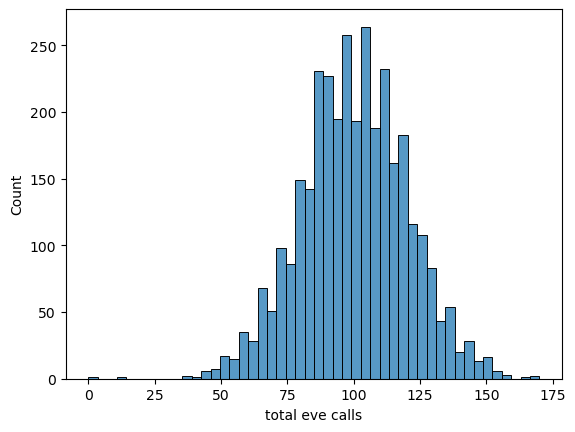

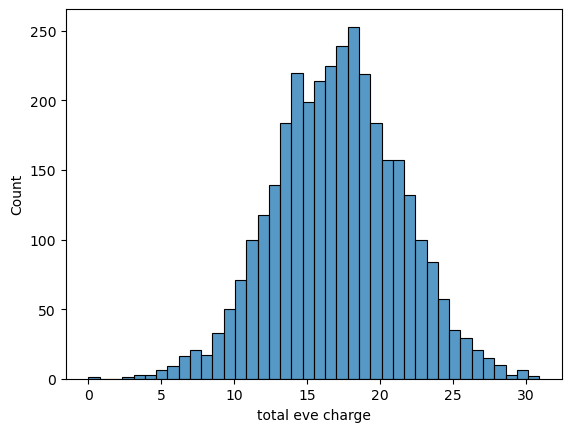

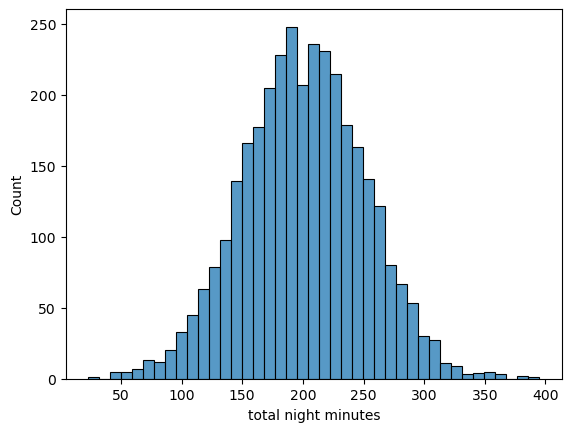

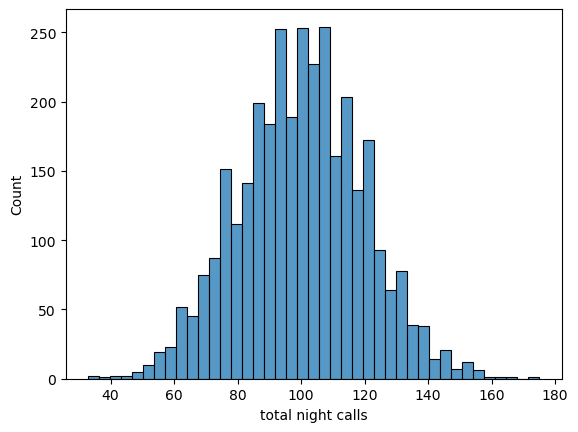

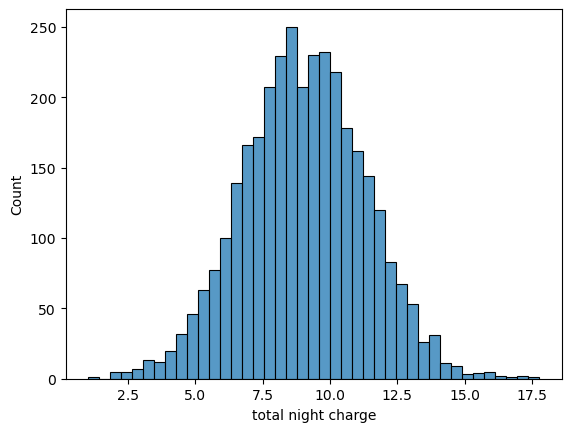

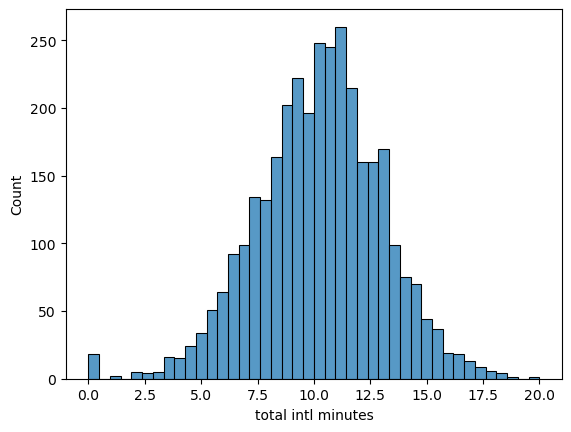

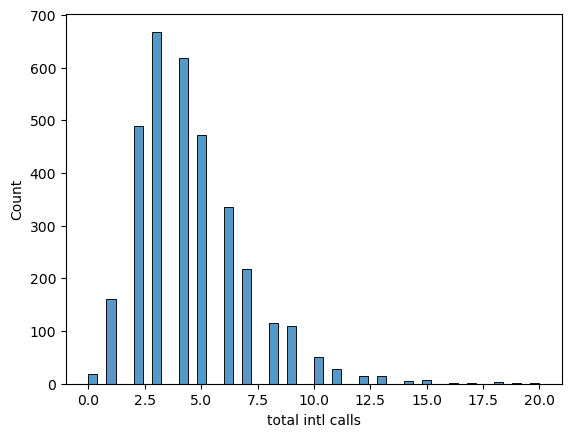

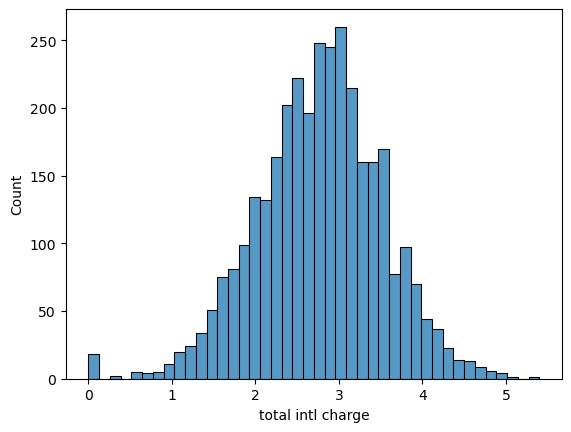

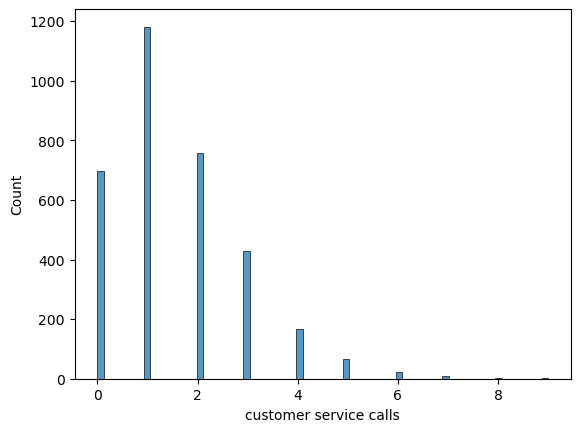

In [35]:
# understanding the distribution of data using a histogram
import warnings
warnings.filterwarnings("ignore")
for i in df1.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

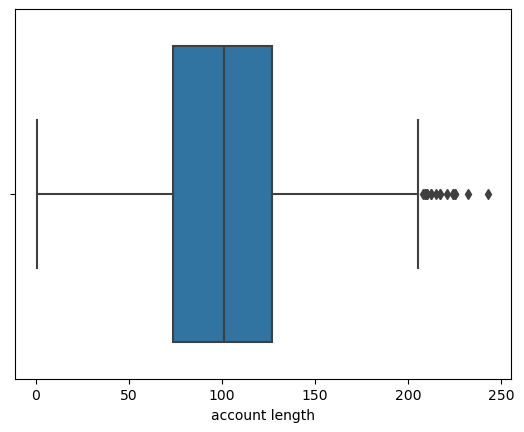

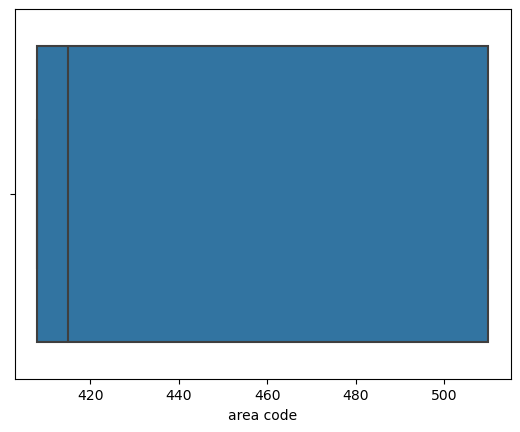

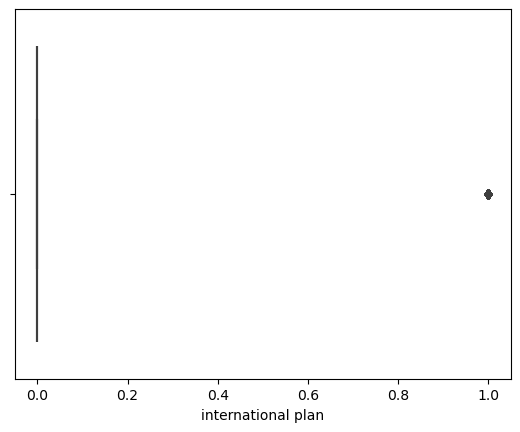

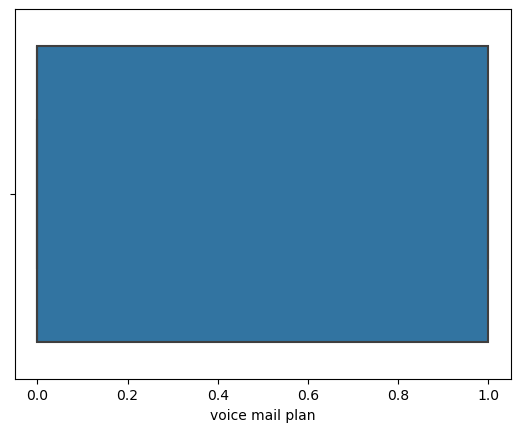

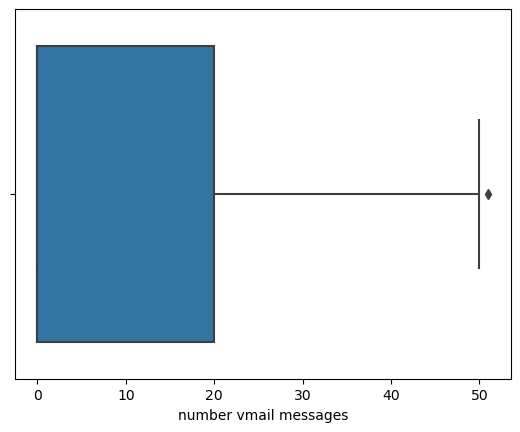

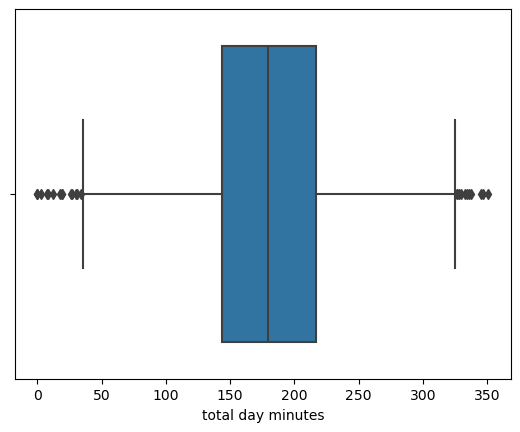

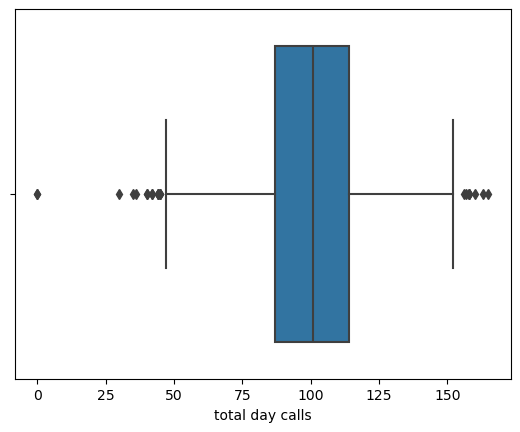

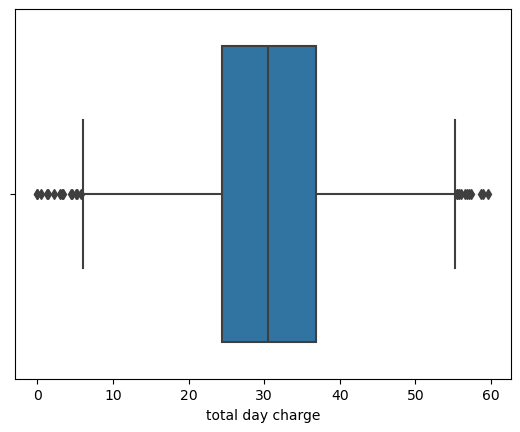

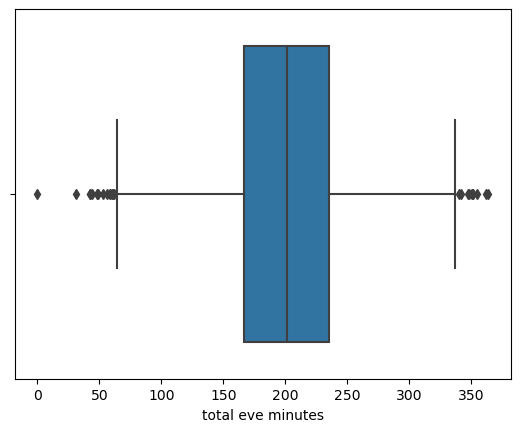

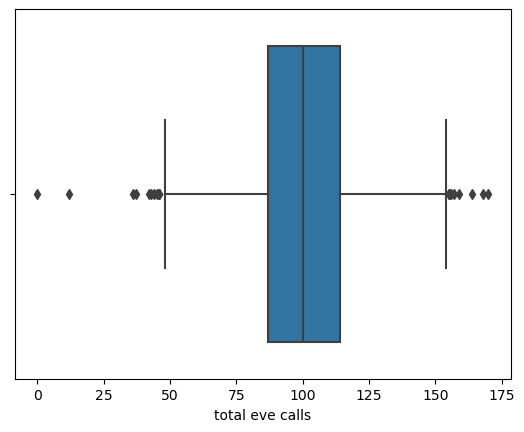

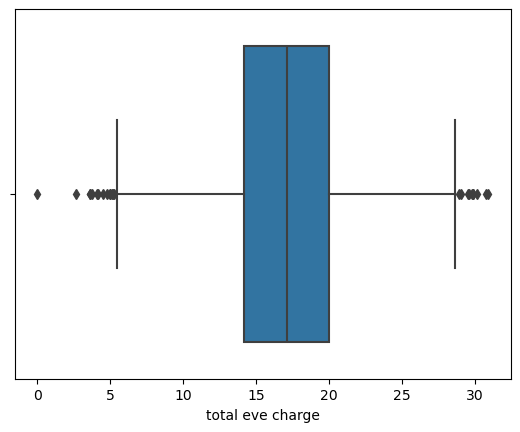

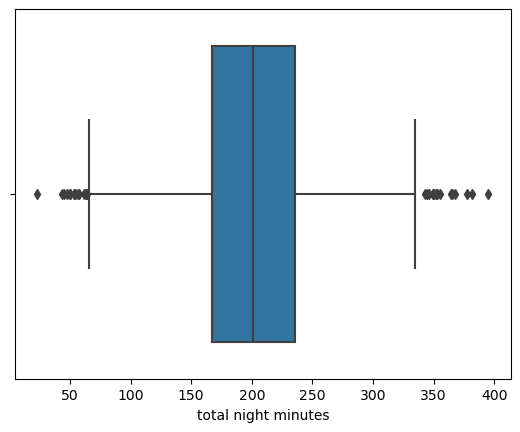

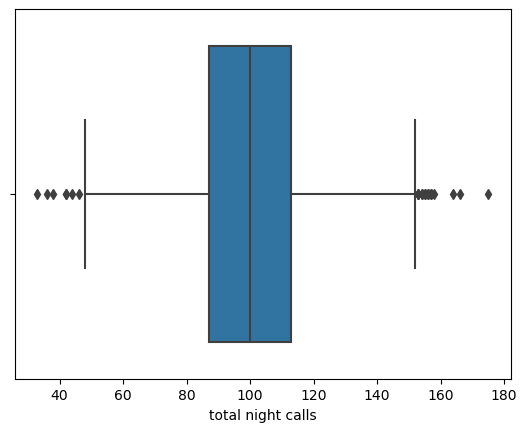

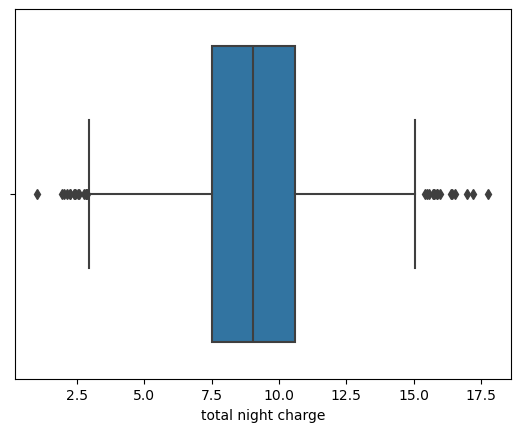

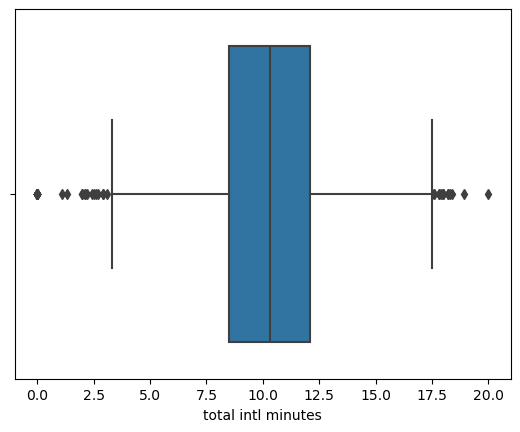

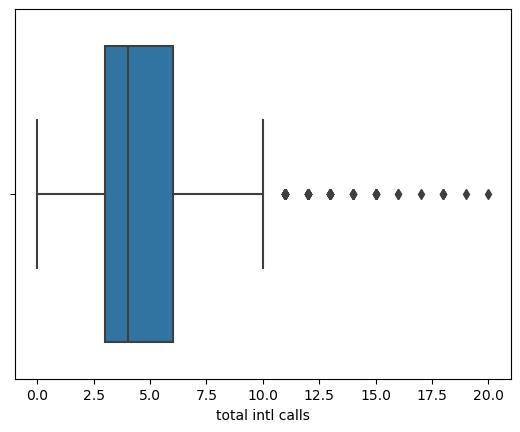

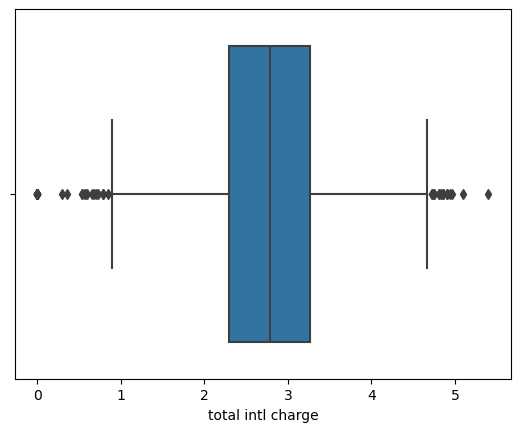

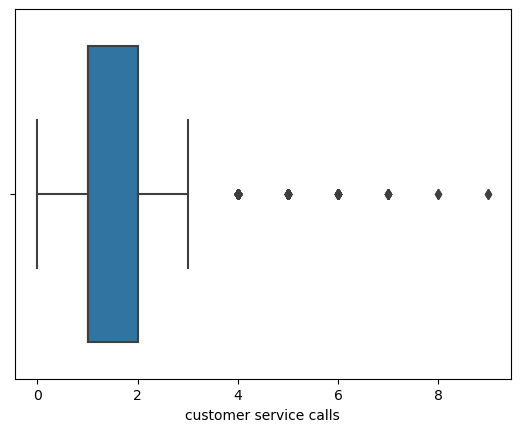

In [36]:
# Identifying outliers using the boxplot
import warnings
warnings.filterwarnings("ignore")
for i in df1.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [39]:
# Understanding the relationship using scatterplot
df1.select_dtypes(include="number").columns

Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'],
      dtype='object')

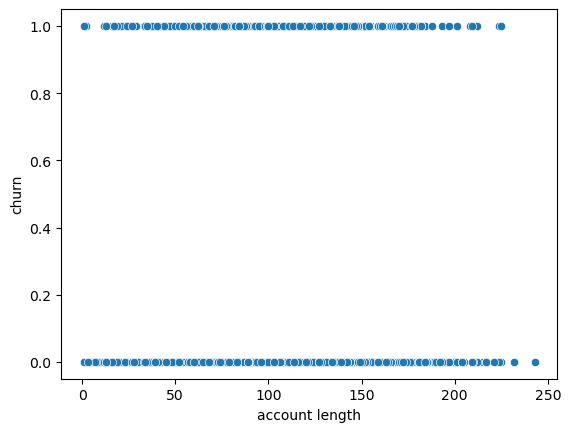

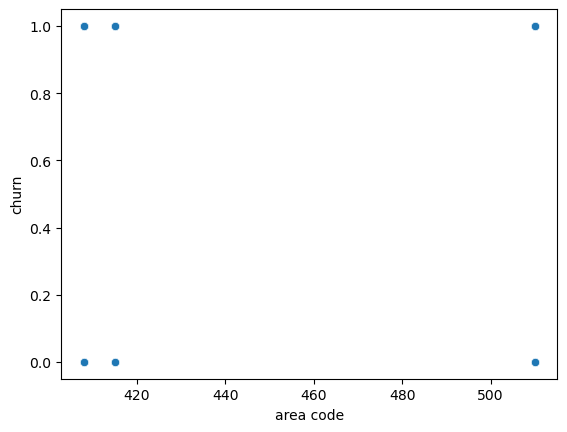

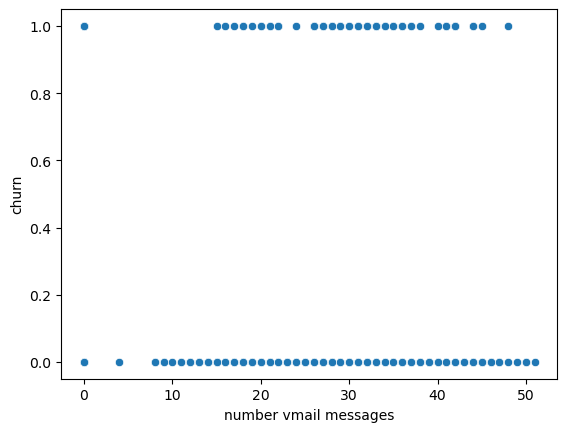

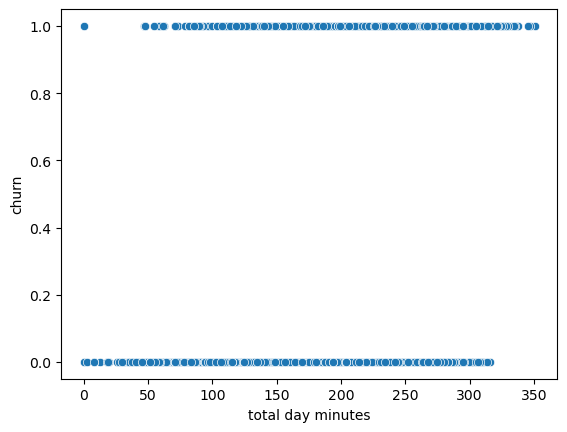

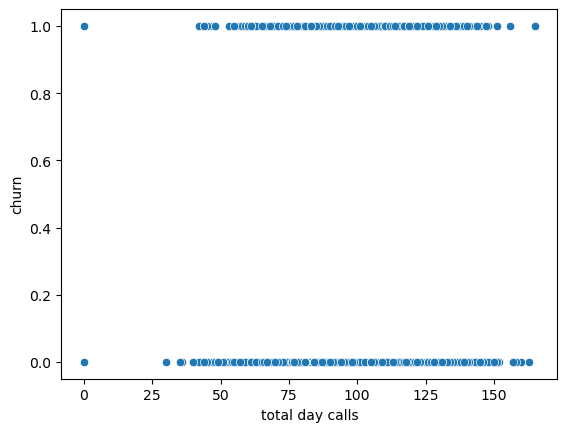

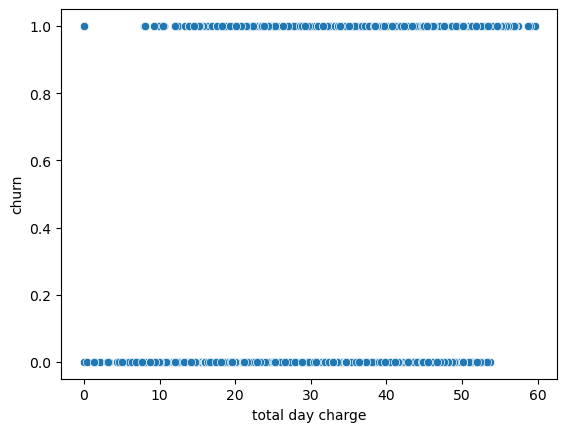

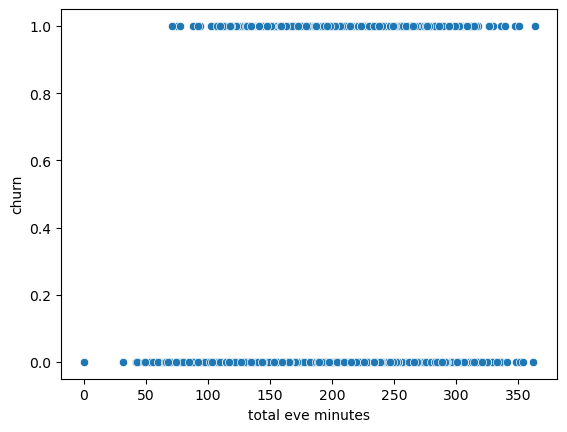

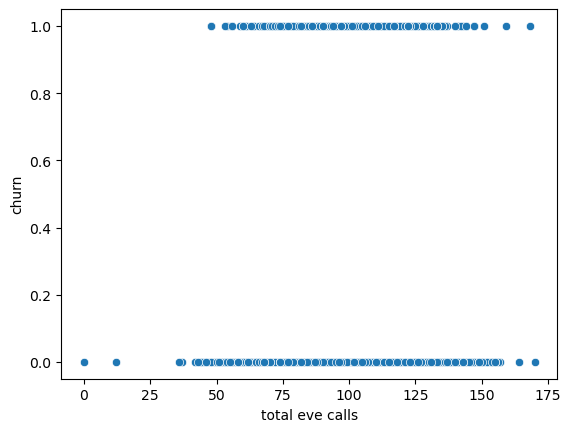

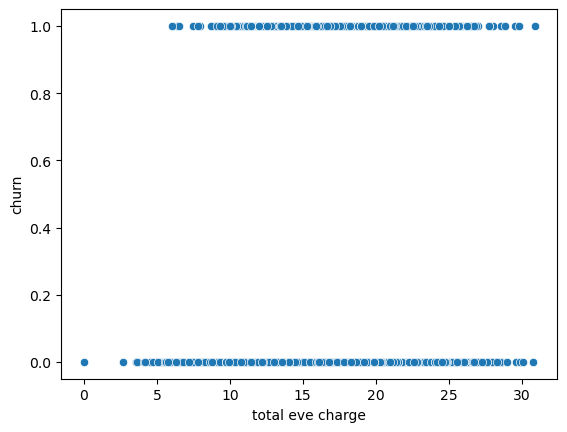

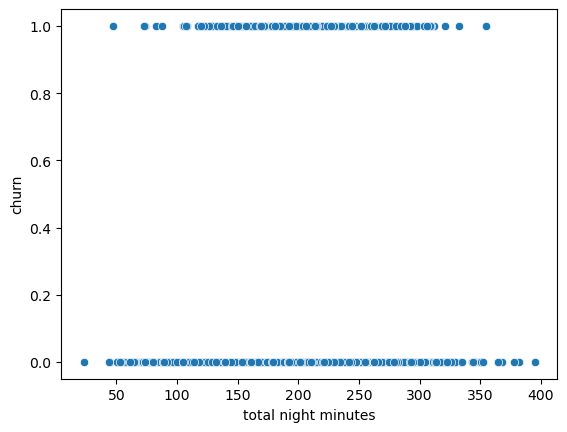

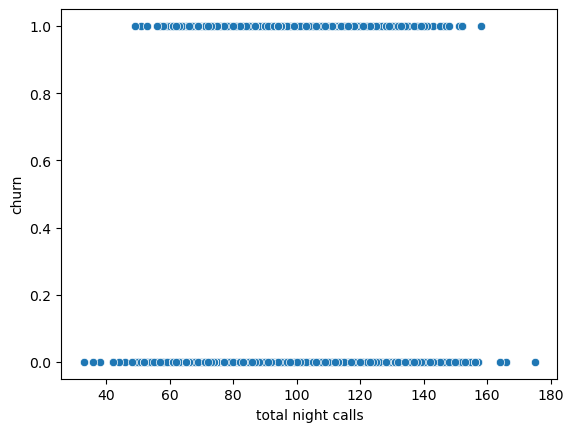

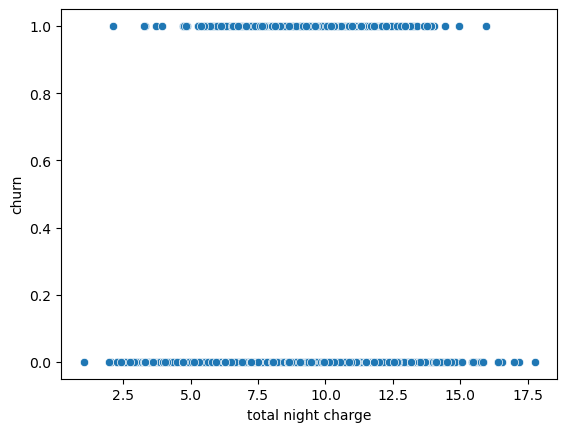

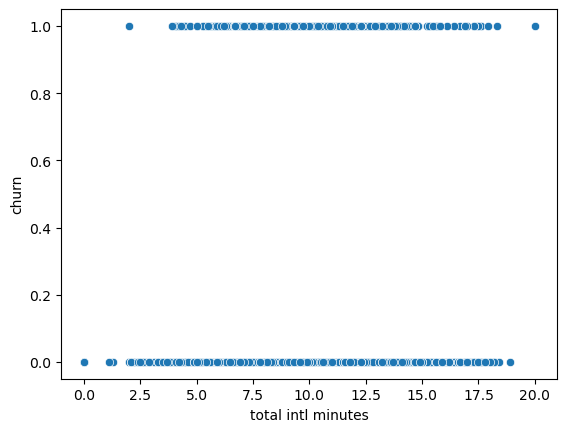

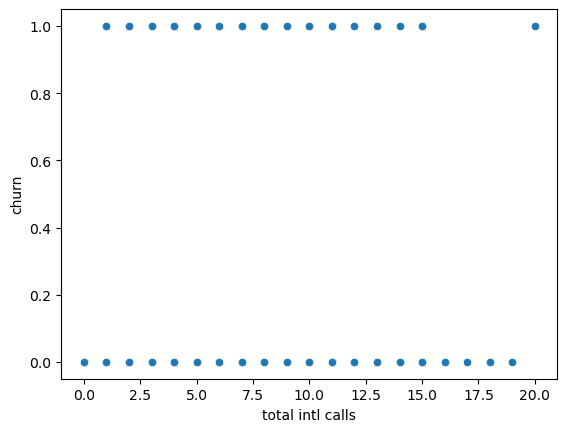

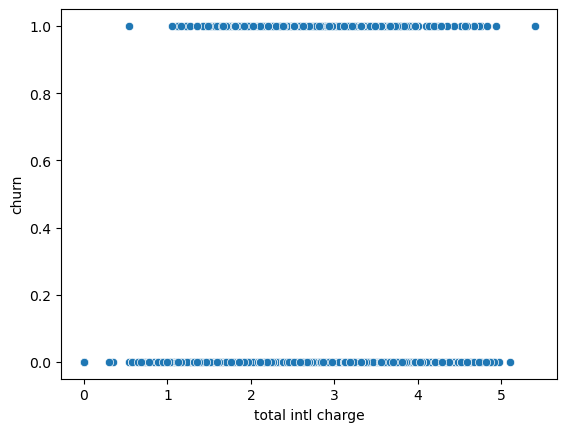

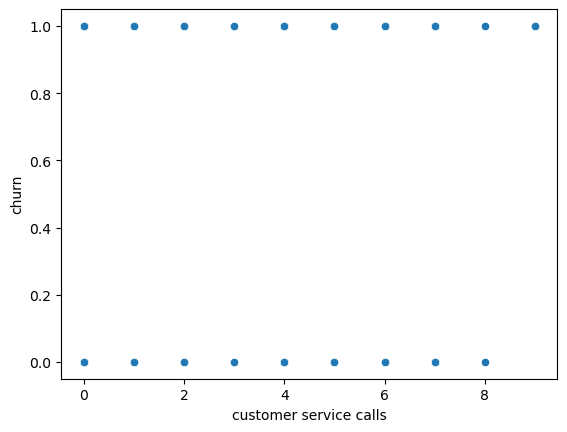

In [41]:
for i in ['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']:
    sns.scatterplot(data=df1,x=i,y='churn')
    plt.show()
    

### Multivariate analysis

In [43]:
# Correlation with to interpret the relation and multicolliniarity
h = df1.select_dtypes(include="number").corr()

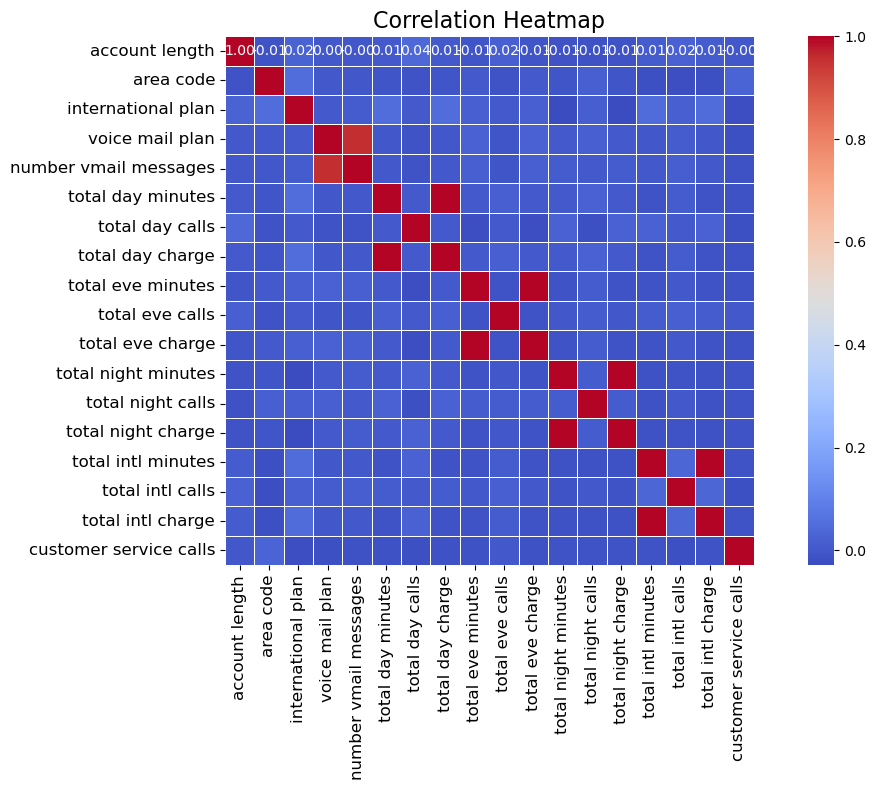

In [45]:
# Compute the correlation matrix for numerical features
h = df1.select_dtypes(include="number").corr()

# Create a heatmap with improved formatting
plt.figure(figsize=(12, 8))
sns.heatmap(
    h, 
    annot=True,  
    fmt='.2f',  
    cmap='coolwarm', 
    square=True,  
    linewidths=0.5,  
    annot_kws={'size': 10}  
)
plt.title('Correlation Heatmap', fontsize=16)  
plt.xticks(fontsize=12, rotation=90)  
plt.yticks(fontsize=12, rotation=0)  
plt.tight_layout()  
plt.show()


The heatmap correlation visually represents the relationships between features in the dataset, showing how strongly they are linearly related. Correlation values range from -1 to 1.

There is a very low correlation between most features.

However, there is a perfect positive correlation between total evening charge and total evening minutes, total day charge and total day minutes, total night charge and total night minutes, and total international charge and total international minutes. This is expected since the charge of a call depends on the length of the call in minutes. One correlated variable will have to be dropped from each pair to handle multicollinearity.

total day minutes, total day charge and customer service calls have a weak positive correlation with churn.

The other features have a negligible correlation with churn, approximately 0. 0. 0.

## Data preparation for Machine Learning

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

### Multicollinearity of features

In [49]:
# pairs with collinearity > 0.75
df2 = df1.select_dtypes(include="number").corr().abs().stack().reset_index().sort_values(0, ascending=False)
df2['pairs'] = list(zip(df2.level_0, df2.level_1))
df2.set_index(['pairs'], inplace = True)
df2.drop(columns=['level_1', 'level_0'], inplace = True)
df2.columns = ['cc']
df2.drop_duplicates(inplace=True)
df2[(df2.cc>.75) & (df2.cc<1)]

,cc
pairs,
"(total day minutes, total day charge)",1.000000
"(total eve minutes, total eve charge)",1.000000
"(total night charge, total night minutes)",0.999999
"(total intl minutes, total intl charge)",0.999993
"(number vmail messages, voice mail plan)",0.956927


In [51]:
# drop some columns to address the collinearity
df1 = df1.drop(columns = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge'])
df1.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls', 'churn'],
      dtype='object')

### Train-test split

In [53]:
# select predictor and target variables
y = df1['churn']
X = df1.drop(columns=['churn'])

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [55]:
# preview of X_train
X_train.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
1066,KS,117,510,0,1,25,216.0,140,224.1,69,267.9,112,11.8,4,0
1553,CO,86,415,0,0,0,217.8,93,214.7,95,228.7,70,11.3,7,0
2628,TN,37,415,0,0,0,221.0,126,204.5,110,118.0,98,6.8,3,4
882,FL,130,415,0,0,0,162.8,113,290.3,111,114.9,140,7.2,3,1
984,NV,77,415,0,0,0,142.3,112,306.3,111,196.5,82,9.9,1,1


### Transform categorical variables

In [63]:
# Creating dummy variables for the categorical columns
X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
1066,117,510,0,1,25,216.0,140,224.1,69,267.9,...,False,False,False,False,False,False,False,False,False,False
1553,86,415,0,0,0,217.8,93,214.7,95,228.7,...,False,False,False,False,False,False,False,False,False,False
2628,37,415,0,0,0,221.0,126,204.5,110,118.0,...,False,True,False,False,False,False,False,False,False,False
882,130,415,0,0,0,162.8,113,290.3,111,114.9,...,False,False,False,False,False,False,False,False,False,False
984,77,415,0,0,0,142.3,112,306.3,111,196.5,...,False,False,False,False,False,False,False,False,False,False


### SMOTE (Synthetic Minority Oversampling Technique)

SMOTE creates synthetic samples for the minority class. It helps handle the problems of class imbalance through oversampling minority class with replacement. 

In [65]:
# Fit SMOTE to training data
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

# Preview synthetic sample class distribution
print(pd.Series(y_train_resampled).value_counts()) 

churn
False    2127
True     2127
Name: count, dtype: int64


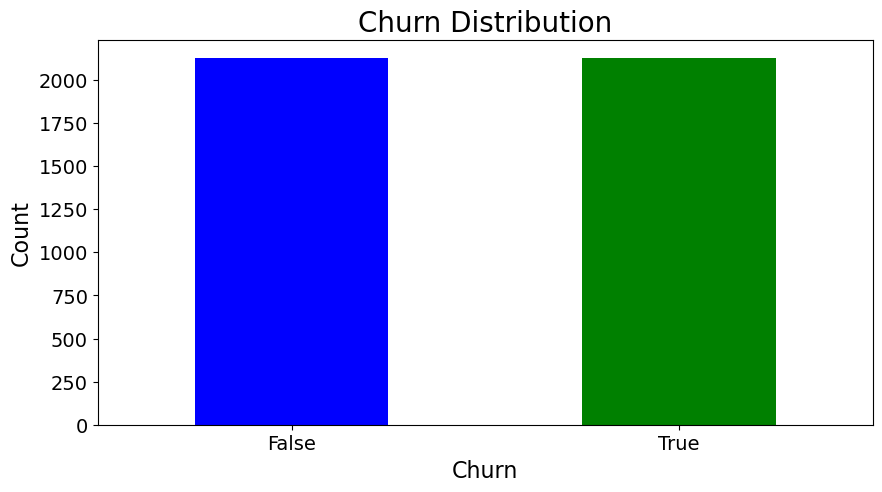

In [61]:
# barchart showing distribution of target variable
fig, ax = plt.subplots(figsize=(10, 5))

y_train_resampled.value_counts().plot(kind='bar', color=['blue', 'green'], ax=ax)
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Churn', fontsize=16)
ax.set_title('Churn Distribution', fontsize=20)
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14)  

plt.xticks(rotation=0) 
plt.show()


In [67]:
# SMOTE not applied to test data
y_test.value_counts()

churn
False    723
True     111
Name: count, dtype: int64

The churn classes are now balanced after applying SMOTE, but it was only applied to the training set. This approach ensures that the model's performance can be accurately evaluated using an untouched test sample that has neither been oversampled nor undersampled.

## Modeling

### Logistic regression

Logistic Regression is a great starting point because it is simple, interpretable, and effective for binary classification tasks.

To implement Logistic regression, you have to train the model by using the logisticregression class from sklearn, predict on the test data such as predicting churn on test set, evealuating the model and lastly the anlyzing the coefficients to understand their impacts to churn probability. 

In [69]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Initialize the Logistic Regression model with desired parameters
logreg_model = LogisticRegression(fit_intercept=False, solver="liblinear")

# Fit the Logistic Regression model on the scaled training data
logreg_model.fit(X_train_scaled, y_train_resampled)

LogisticRegression(fit_intercept=False, solver='liblinear')

In [71]:
# Function to evaluate the performance of the model
def evaluate(model, X_train, y_train, X_test, y_test):
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)
    
    print("Recall_score:")
    print("Train: ", recall_score(y_train, y_train_preds))
    print("Test: ", recall_score(y_test, y_test_preds))
    
    print("\nPrecision_score:")
    print("Train: ", precision_score(y_train, y_train_preds))
    print("Test: ", precision_score(y_test, y_test_preds))
    
    print("\nAccuracy_score:")
    print("Train: ", accuracy_score(y_train, y_train_preds))
    print("Test: ", accuracy_score(y_test, y_test_preds))
    
    cm = confusion_matrix(y_test, y_test_preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

Recall_score:
Train:  0.8519040902679831
Test:  0.27927927927927926

Precision_score:
Train:  0.9491880565741225
Test:  0.5

Accuracy_score:
Train:  0.9031499764927128
Test:  0.8669064748201439


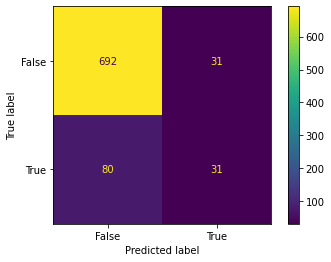

In [35]:
# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Evaluate the performance of the Logistic Regression model
evaluate(logreg_model, X_train_scaled, y_train_resampled, X_test_scaled, y_test)

The model exhibits overfitting, performing well on the training data but struggling on the test data. Although the test accuracy is high, the recall score is very low, indicating poor performance. This is primarily due to the large number of false negatives, where the model fails to correctly identify churned customers.

### Decision Tree model

Decision Trees are a powerful yet interpretable machine learning algorithm that can be used for classification tasks like churn prediction.

Decision Trees split the dataset into smaller subsets based on feature values, creating a tree-like structure with nodes and branches.

At each node, the algorithm selects the feature and threshold that best separate the classes (using measures like Gini Impurity or Entropy).
The process continues until a stopping criterion is met, such as maximum depth or minimum samples per leaf.

In [73]:
# Standardize features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Train Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train_resampled_scaled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=42)

The decision tree model has a higher performance compared to the baseline model. However, the model is overfitting.

In [75]:
# Manually checking the steps (simulating the pipeline steps attribute)
steps = [('scale', scaler), ('clf', clf)]
steps

[('scale', StandardScaler()),
 ('clf', DecisionTreeClassifier(criterion='entropy', random_state=42))]

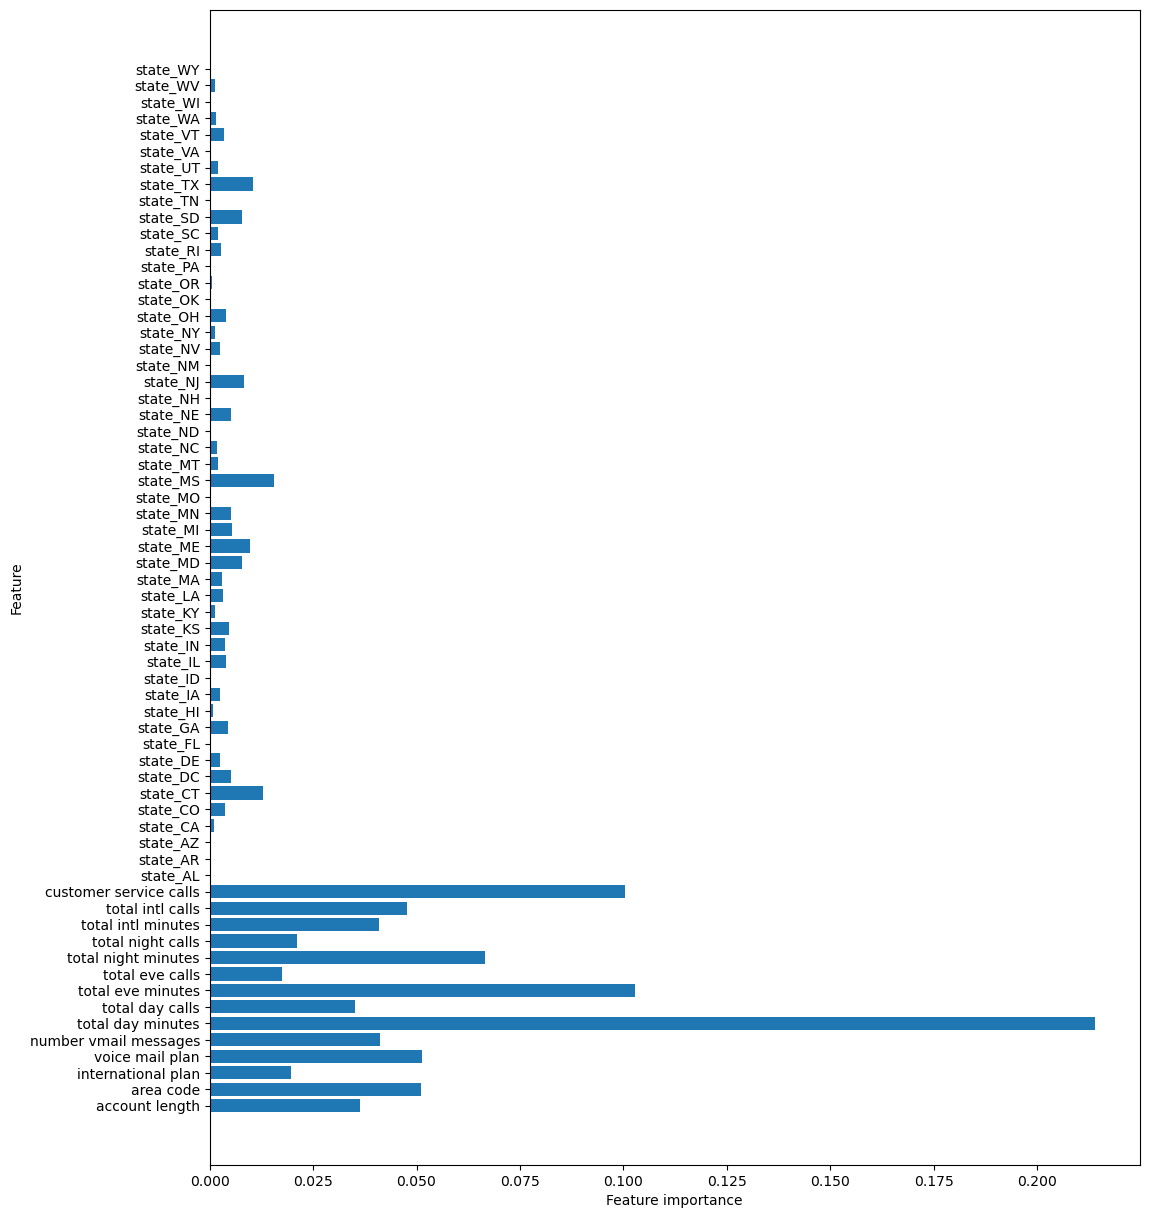

In [77]:
# Function to plot feature importances
def plot_feature_importances(model, feature_names, figsize):
    plt.figure(figsize=figsize)
    plt.barh(feature_names, model.feature_importances_, align='center')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.show()

# Plot feature importances
plot_feature_importances(clf, X_train_resampled.columns, (12, 15))


total day minutes plays an important role in determining whether a customer would churn or not, followed by total evening minutes and customer service calls. The least importance in predicting customer churn is state.

### Feature selection

Feature Selection is an essential step to improve the performance of your model by keeping only the most relevant features. It helps reduce noise, prevent overfitting, and improve model interpretability.

In [105]:
# Standardize features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Perform RFECV
rfecv = RFECV(estimator=DecisionTreeClassifier(random_state=42), scoring='recall')
X_train_resampled_selected = rfecv.fit_transform(X_train_resampled_scaled, y_train_resampled)

# Train Decision Tree classifier on the selected features
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_resampled_selected, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [107]:
# Optimal number of features selected via cross-validation  
f'Optimal number of features: {rfecv.n_features_}'

'Optimal number of features: 59'

The selected features are shown below:

In [109]:
# selected features (assigned a rank of 1)
rfecv_df = pd.DataFrame(rfecv.ranking_,index=X_train_resampled.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv_df[rfecv_df['Rank'] == 1]

,Rank
account length,1
state_LA,1
state_KS,1
area code,1
international plan,1
voice mail plan,1
number vmail messages,1
total day minutes,1
total day calls,1
total eve minutes,1


In [111]:
# remove columns that are not part of the optimal features
cols = rfecv_df[rfecv_df['Rank'] == 1].index
X_train_resampled = X_train_resampled[cols]
X_test = X_test[cols]
X_train_resampled.head()

,account length,state_LA,state_KS,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,...,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_MA,state_AZ
0,117,False,True,510,0,1,25,216.0,140,224.1,...,False,False,False,False,False,False,False,False,False,False
1,86,False,False,415,0,0,0,217.8,93,214.7,...,False,False,False,False,False,False,False,False,False,False
2,37,False,False,415,0,0,0,221.0,126,204.5,...,False,False,False,True,False,False,False,False,False,False
3,130,False,False,415,0,0,0,162.8,113,290.3,...,False,False,False,False,False,False,False,False,False,False
4,77,False,False,415,0,0,0,142.3,112,306.3,...,False,False,False,False,False,False,False,False,False,False


### Hyperparameter tuning of the decision tree model

In [113]:
# Define parameter grid for Decision Tree classifier
params_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(14, 32, 2),
    'min_samples_split': range(2, 10, 2),
    'min_samples_leaf': [2, 3, 5, 7, 10],
    'max_features': [11, 13, 15]
}

# Initialize Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform Grid Search CV
gridsearch_dt = GridSearchCV(clf, params_dt, cv=4, scoring='recall')
gridsearch_dt.fit(X_train_resampled_scaled, y_train_resampled)


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(14, 32, 2),
                         'max_features': [11, 13, 15],
                         'min_samples_leaf': [2, 3, 5, 7, 10],
                         'min_samples_split': range(2, 10, 2)},
             scoring='recall')

In [121]:
# parameters that gave the best result
print(f'Optimal parameters: {gridsearch_dt.best_params_}')

# Mean cross-validated score of the best_estimator
print(f'Validation recall: {gridsearch_dt.best_score_}')

Optimal parameters: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 13, 'min_samples_leaf': 3, 'min_samples_split': 2}
Validation recall: 0.8608429619245854


Aligned Training set shape: (4254, 59)
Aligned Test set shape: (834, 59)
Recall_score:
Train:  0.9055007052186178
Test:  0.918918918918919

Precision_score:
Train:  0.4836765444500251
Test:  0.12862547288776796

Accuracy_score:
Train:  0.4694405265632346
Test:  0.1606714628297362


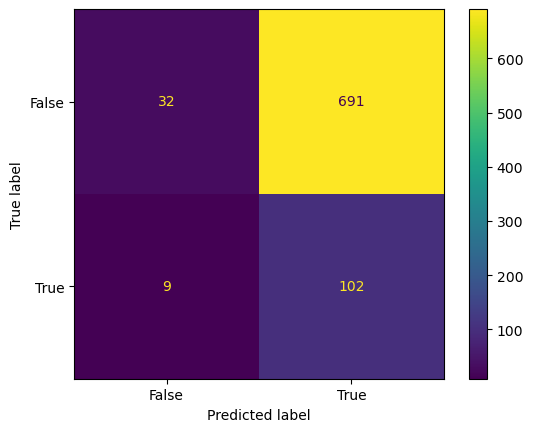

In [123]:
# Align test set with training set
X_test_aligned = X_test[X_train_resampled.columns]

# Verify alignment
print("Aligned Training set shape:", X_train_resampled.shape)
print("Aligned Test set shape:", X_test_aligned.shape)

# Evaluate model with aligned datasets
evaluate(gridsearch_dt, X_train_resampled, y_train_resampled, X_test_aligned, y_test)


Recall_score:
Train:  0.9055007052186178
Test:  0.918918918918919

Precision_score:
Train:  0.4836765444500251
Test:  0.12862547288776796

Accuracy_score:
Train:  0.4694405265632346
Test:  0.1606714628297362


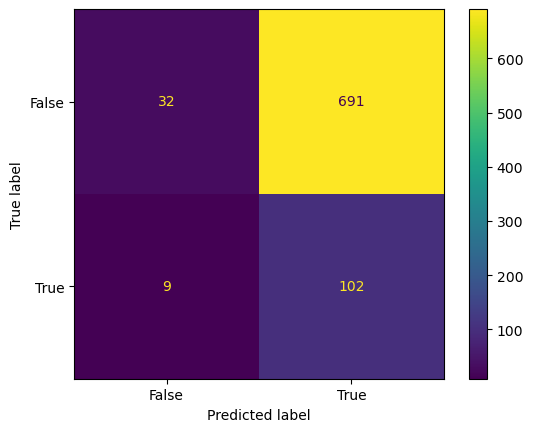

In [125]:
# Evaluate the performance of the model 
# Evaluate the performance of the tuned model
evaluate(gridsearch_dt, X_train_resampled, y_train_resampled, X_test, y_test)

After tuning the model, its performance has improved, as indicated by a higher recall score. However, the precision score has slightly decreased. Additionally, the gap between training and testing scores has narrowed, indicating a reduction in overfitting.

## Model evaluation

The decision tree model with optimized hyperparameters demonstrates the best performance. The optimal parameters identified are:

'clif_criterion': 'entropy' <br>
'clf__max_depth': 28 <br>
'clf__max_features': 15 <br>
'clf__min_samples_leaf': 2 <br>
'clf__min_samples_split': 2 <br>

This model achieves the highest recall score among all tested models, with accuracy and precision scores exceeding average benchmarks. However, the recall score remains below the target threshold of 85%.

The evaluation metrics for the tuned decision tree are as follows:

In [127]:
# evaluation metrics of the best model based on the test data
print('DECISION TREE(TUNED) SCORES:')
print('Test Recall score: ', recall_score(y_test, gridsearch_dt.predict(X_test)))
print('Test Precision score: ', precision_score(y_test, gridsearch_dt.predict(X_test)))
print('Test Accuracy score: ', accuracy_score(y_test, gridsearch_dt.predict(X_test)))

DECISION TREE(TUNED) SCORES:
Test Recall score:  0.918918918918919
Test Precision score:  0.12862547288776796
Test Accuracy score:  0.1606714628297362


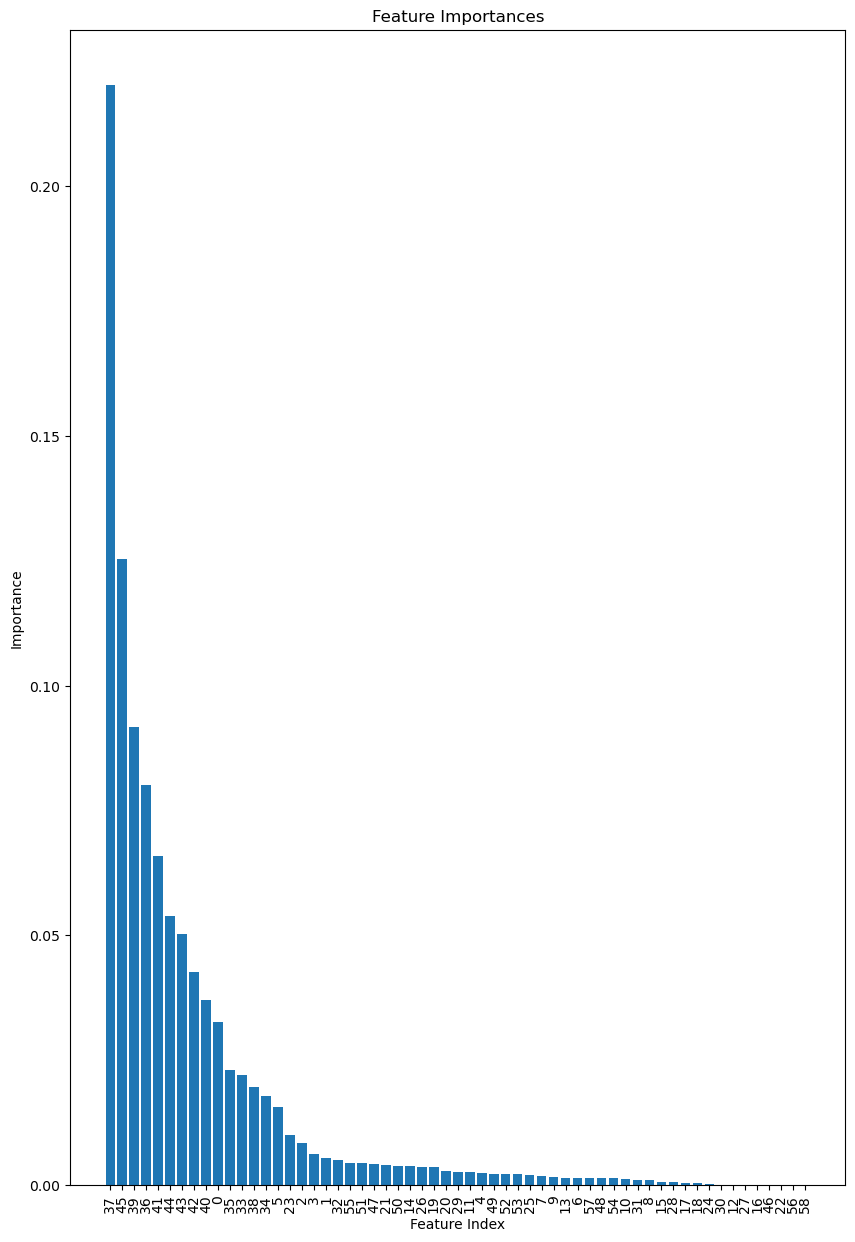

In [150]:
# plot feature importances of the best model using the defined function
plot_feature_importances(gridsearch_dt.best_estimator_, (10,15))

## Conclusions and Recommendations

The final model selected for predicting customer churn is the decision tree with optimized hyperparameters. This model minimizes the number of false negatives, making it highly effective at identifying customers likely to churn.<br>

The key features contributing the most to predicting customer churn are:<br>
- total day minutes: total number of minutes the customer has been in calls during the day
- total evening minutes: total number of minutes the customer has been in calls during the evening
- customer service calls: number of calls the customer has made to customer service
- total international minutes: total number of minutes the user has been in international calls


### Recommendations

Syriatel should prioritize delivering exceptional customer service to meet customer expectations and carefully analyze customer interactions. Following up on both positive and negative feedback is essential for maintaining customer satisfaction.

Additionally, data indicates that customers who spend more time on calls are less likely to churn. The company should evaluate its call charge rates relative to competitors and consider reducing per-minute rates if necessary to retain more customers and reduce churn.

## Next Steps

The best-performing model falls short of achieving the targeted recall score of 85%. Despite hyperparameter tuning, some overfitting
persists.<br>

Increasing the size of the training dataset could help reduce overfitting and enhance the model's overall performance.